### Stock Market Prediction

The variables:
Open - It is price with which the stock started trading when the market opened that particular day
Close - It is price of an individual stock when the stock exchange closed markets that particular day. It is the last Buy Sell order executed between 2 traders
High - It is the highest price of which the stock got traded in that period
Low - It is the lowest price of which the stock got traded in that period
Shares Traded - the number of shares that have been bought and sold during a specific period (e.g., a day, week, or month). 
Turnover- refers to the total value of all executed transactions (both buys and sells) within a specific time period, essentially representing the total amount of money traded in a market. Example: If you buy and sell 100 shares of a stock at ₹100 per share, your turnover for that trade is ₹10,000 (100 shares * ₹100/share). 

Relationship between Shares Traded and Turnover
Think of it this way: shares traded is the quantity, and turnover is the value of that quantity. 
Turnover Ratio: This ratio is calculated by dividing the total value of shares traded by the market capitalization (the total value of all outstanding shares). 
Interpretation: A higher turnover ratio suggests greater trading activity and liquidity in the market, while a lower ratio might indicate less interest or lower liquidity. 

In [3]:
!pip install chart_studio

In [4]:
!pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)


### Steps to follow
**1. Import the necessary libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

**2. Load the Data File and convert the Date object to Datetime if date column exists and explore the data**

In [6]:
import pandas as pd
NIFTY50=pd.read_csv("NIFTY 50-12-03-2024-to-12-03-2025.csv",parse_dates=True)
df=pd.DataFrame(NIFTY50)
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,12-MAR-2024,22334.45,22452.55,22256.00,22335.70,299201167.0,29781.12
1,13-MAR-2024,22432.20,22446.75,21905.65,21997.70,493341697.0,40109.23
2,14-MAR-2024,21982.55,22204.60,21917.50,22146.65,426742460.0,37348.30
3,15-MAR-2024,22064.85,22120.90,21931.70,22023.35,661460455.0,60260.88
4,18-MAR-2024,21990.10,22123.70,21916.55,22055.70,356321519.0,23015.51
...,...,...,...,...,...,...,...
244,05-MAR-2025,22073.05,22394.90,22067.80,22337.30,305942691.0,26371.61
245,06-MAR-2025,22476.35,22556.45,22245.85,22544.70,372083680.0,30550.28
246,07-MAR-2025,22508.65,22633.80,22464.75,22552.50,289765795.0,21446.95
247,10-MAR-2025,22521.85,22676.75,22429.05,22460.30,293855491.0,22330.86


In [7]:
import pandas as pd
df=pd.read_csv("NIFTY 50-12-03-2024-to-12-03-2025.csv",parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,12-MAR-2024,22334.45,22452.55,22256.00,22335.70,299201167.0,29781.12
1,13-MAR-2024,22432.20,22446.75,21905.65,21997.70,493341697.0,40109.23
2,14-MAR-2024,21982.55,22204.60,21917.50,22146.65,426742460.0,37348.30
3,15-MAR-2024,22064.85,22120.90,21931.70,22023.35,661460455.0,60260.88
4,18-MAR-2024,21990.10,22123.70,21916.55,22055.70,356321519.0,23015.51


In [11]:
# Strip spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [12]:
# Step 2: Convert 'Date' column to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\Keert\AppData\Local\Temp\ipykernel_15976\964353663.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             249 non-null    datetime64[ns]
 1   Open             249 non-null    float64       
 2   High             249 non-null    float64       
 3   Low              249 non-null    float64       
 4   Close            249 non-null    float64       
 5   Shares Traded    248 non-null    float64       
 6   Turnover (₹ Cr)  248 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.7 KB


In [14]:
df.describe()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,249,249.000000,249.000000,249.000000,249.000000,2.480000e+02,248.000000
mean,2024-09-12 03:28:11.566265088,23741.716064,23848.474900,23605.723695,23725.286145,3.096375e+08,31748.203548
min,2024-03-12 00:00:00,21843.900000,21930.900000,21281.450000,21817.450000,1.906457e+07,1572.770000
25%,2024-06-13 00:00:00,22766.350000,22910.150000,22642.600000,22753.800000,2.512036e+08,25474.560000
50%,2024-09-12 00:00:00,23769.100000,23869.550000,23599.300000,23727.650000,2.893708e+08,29392.740000
75%,2024-12-12 00:00:00,24543.800000,24638.800000,24378.100000,24541.150000,3.516046e+08,35361.040000
max,2025-03-11 00:00:00,26248.250000,26277.350000,26151.400000,26216.050000,1.006105e+09,93786.440000
std,NaN,1066.327297,1061.319586,1075.143418,1065.749480,1.026386e+08,11361.551049


**3. Check for null values and Duplicated values**

In [15]:
df.isna().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

**4. Remove or Fill Null values appropriately and Remove duplicate rows if found**

In [17]:
df.ffill(inplace=True)
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2024-03-12,22334.45,22452.55,22256.00,22335.70,299201167.0,29781.12
1,2024-03-13,22432.20,22446.75,21905.65,21997.70,493341697.0,40109.23
2,2024-03-14,21982.55,22204.60,21917.50,22146.65,426742460.0,37348.30
3,2024-03-15,22064.85,22120.90,21931.70,22023.35,661460455.0,60260.88
4,2024-03-18,21990.10,22123.70,21916.55,22055.70,356321519.0,23015.51
...,...,...,...,...,...,...,...
244,2025-03-05,22073.05,22394.90,22067.80,22337.30,305942691.0,26371.61
245,2025-03-06,22476.35,22556.45,22245.85,22544.70,372083680.0,30550.28
246,2025-03-07,22508.65,22633.80,22464.75,22552.50,289765795.0,21446.95
247,2025-03-10,22521.85,22676.75,22429.05,22460.30,293855491.0,22330.86


In [18]:
df.isna().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

**5. EDA-Exploratory Data Analysis**
Now, let’s visualize the stock price trends.
I’ll generate the following plots: 

1️⃣ Closing Price Trend – Line plot over time.

2️⃣ Moving Averages – 7-day and 30-day to identify trends.

3️⃣ Daily Returns Distribution – Volatility analysis.

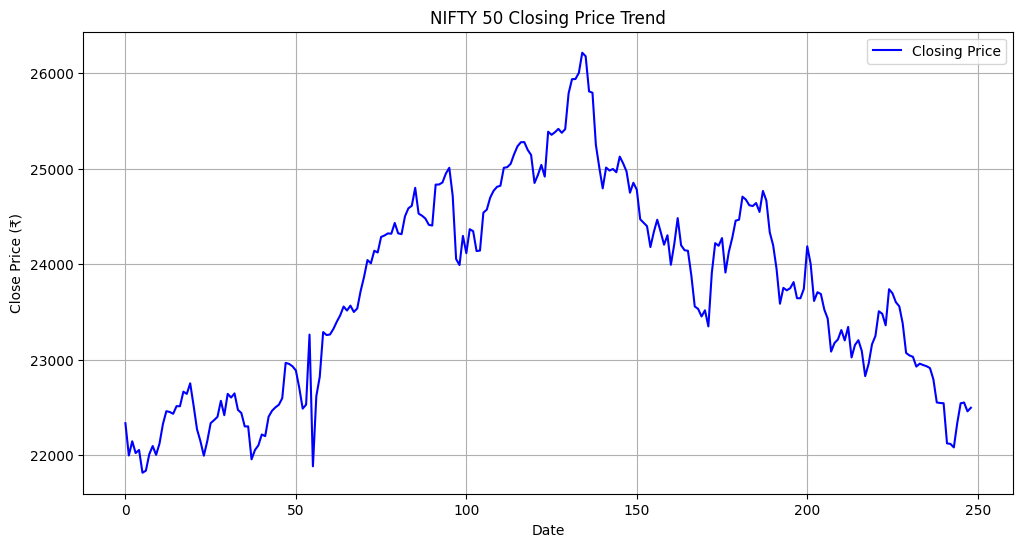

In [19]:
#Closing Price Trend – Line plot over time.
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price (₹)')
plt.title('NIFTY 50 Closing Price Trend')
plt.legend()
plt.grid()
plt.show()

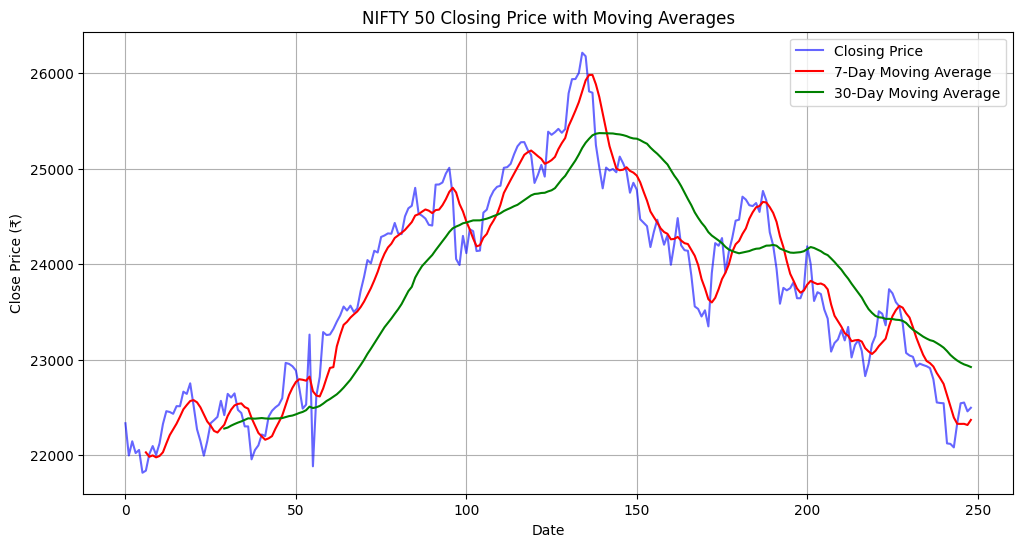

In [20]:
# Compute moving averages
df['7-Day MA'] = df['Close'].rolling(window=7).mean()
df['30-Day MA'] = df['Close'].rolling(window=30).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['7-Day MA'], label='7-Day Moving Average', color='red')
plt.plot(df.index, df['30-Day MA'], label='30-Day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price (₹)')
plt.title('NIFTY 50 Closing Price with Moving Averages')
plt.legend()
plt.grid()
plt.show()

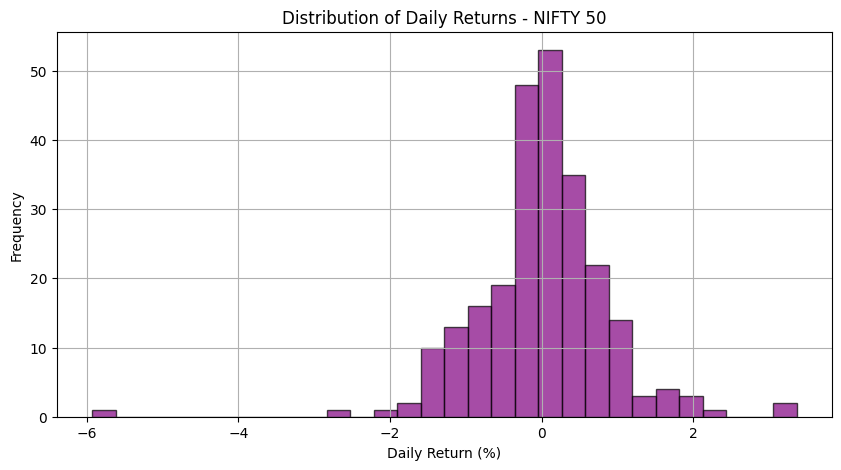

In [21]:
# Calculate daily returns
df['Daily Returns'] = df['Close'].pct_change() * 100

# Plot histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(df['Daily Returns'].dropna(), bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns - NIFTY 50')
plt.grid()
plt.show()

**6. Visualize the data**

<Axes: >

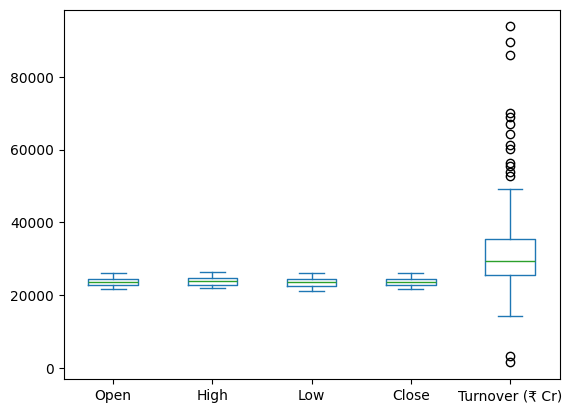

In [22]:
df[['Open','High','Low','Close','Turnover (₹ Cr)']].plot(kind='box')

In [23]:
import pandas as pd
import cufflinks as cf
from plotly.offline import init_notebook_mode

# Enable interactive plotting
init_notebook_mode(connected=True)
cf.go_offline()

# Ensure the Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create an interactive line chart using iplot
df.iplot(
    x="Date",
    y="Close",  # Replace with the correct column for stock prices
    kind="line",
    title="Stock Price of NIFTY 50",
    xTitle="Date",
    yTitle="Price",
    theme="solar"
)


C:\Users\Keert\anaconda3\envs\JupyterNotebook-IntWebAppEnv\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scatter.line
        Received value: 'rgba(255, 153, 51, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

**6. Import the necessary libraries that you want to train and test the data, scale the data and Evaluate the model**

In [ ]:
#Building the Regression model
from sklearn.model_selection import train_test_split

#StandardScaler will convert the column values from -1 to 1 and they will be normally distributed
from sklearn.preprocessing import StandardScaler
#MinMaxScaler scales the data so that it is in the range of [0, 1]
from sklearn.preprocessing import MinMaxScaler #uniform distribution of data(0 to 1)

#For the model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#Split the data to train and test
X=np.array(df.index).reshape(-1,1)
Y=df['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

#### Feature Scaling with Train data

In [ ]:
#Feature Scaling
scaler=StandardScaler().fit(X_train)

**7. Create a model with Linear Regression Algorithm**

In [60]:
from sklearn.linear_model import LinearRegression
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

C:\Users\Keert\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



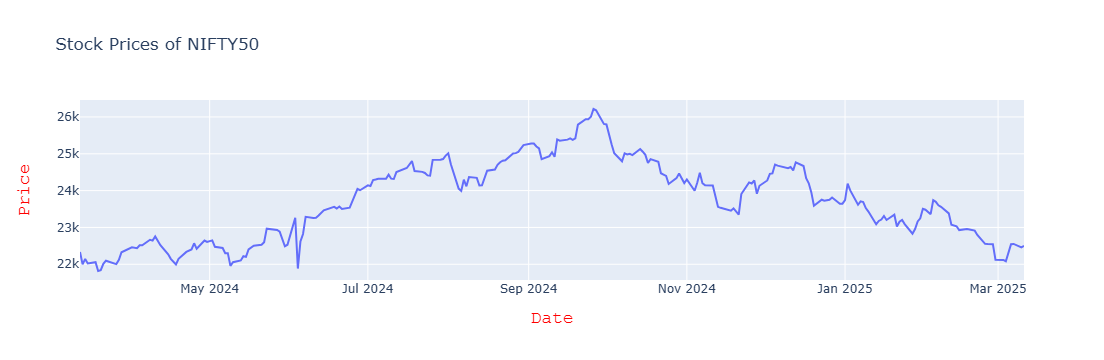

In [61]:
#Setting layout for our plot
layout=go.Layout(
    title='Stock Prices of NIFTY50',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='red'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='red'
        )
    )
)
NIFTY50_data=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=NIFTY50_data,layout=layout)
iplot(plot)

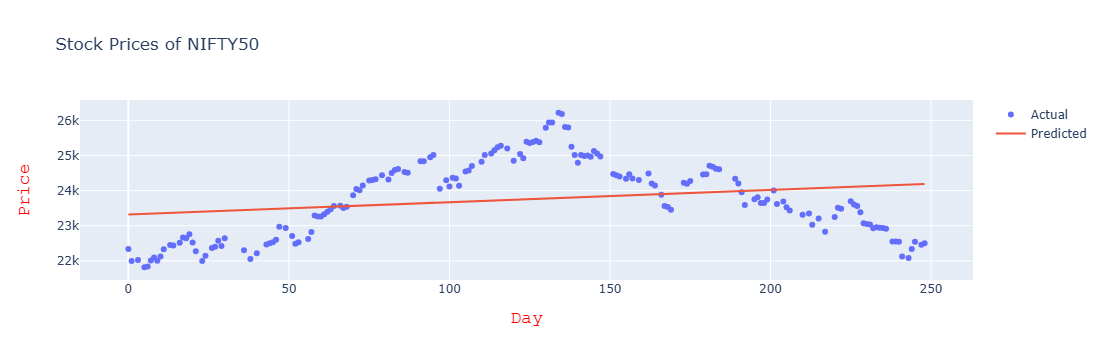

In [62]:
#plot actual and predicted values for train dataset
trace0=go.Scatter(x=X_train.T[0],
                 y=Y_train,
                 mode='markers',
                 name='Actual'
        )
trace1=go.Scatter(x=X_train.T[0],
                 y=lm.predict(X_train).T,
                 mode='lines',
                 name='Predicted'
        )
NIFTY50_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=NIFTY50_data,layout=layout)
iplot(plot2)

In [63]:
#Calulate the scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.05417139567599183	0.08047932362072063
MSE       1118901.3414294394	924998.9322576966



**Conclusion:** 
1. A low R² score means the model is not capturing enough patterns from the data.
2. The model's prediction errors are quite large, meaning it struggles to generalize well.

### NOTE: The Conclusion is that LINEAR REGRESSION is not the suitable for our model for this data as r2_score and MSE vales are not as expected

**8. Let's use ARIMA model**

ARIMA (AutoRegressive Integrated Moving Average) is a powerful model for time series forecasting. It captures trends, seasonality, and patterns in stock prices.

To use ARIMA model we should first Go through some EDA(Exploratory Data Analysis)

✅ Steps to Implement ARIMA:

1️⃣ Check for Stationarity (Stock prices should have a constant mean & variance).

2️⃣ Make the Data Stationary (Use differencing if needed).

3️⃣ Identify ARIMA Parameters (p, d, q) using ACF & PACF plots.

4️⃣ Train the ARIMA Model on historical data.

5️⃣ Make Predictions for future prices.

In [64]:
#Let’s start by checking stationarity using the Augmented Dickey-Fuller (ADF) test.
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on 'Close' prices
adf_test = adfuller(df['Close'])

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]

# Print ADF test results
adf_statistic, p_value
#If the test's p-value is below a certain threshold (commonly 0.05), it suggests that the time series does not have a unit root and is stationary.

(-1.5887481339895921, 0.48924321058570786)

In [65]:
#I will now apply first-order differencing (d=1) and recheck stationarity.
# Apply first-order differencing
df['Close_Diff'] = df['Close'].diff()

# Drop NaN values from differencing
df.dropna(inplace=True)

# Perform ADF test again on differenced data
adf_test_diff = adfuller(df['Close_Diff'])
adf_statistic_diff = adf_test_diff[0]
p_value_diff = adf_test_diff[1]

# Print ADF test results after differencing
adf_statistic_diff, p_value_diff

(-16.793914503098947, 1.2356553069867375e-29)

In an ARIMA (p, d, q) model, 'p' represents the order of the autoregressive model, 'd' the degree of differencing, and 'q' the order of the moving average model. 

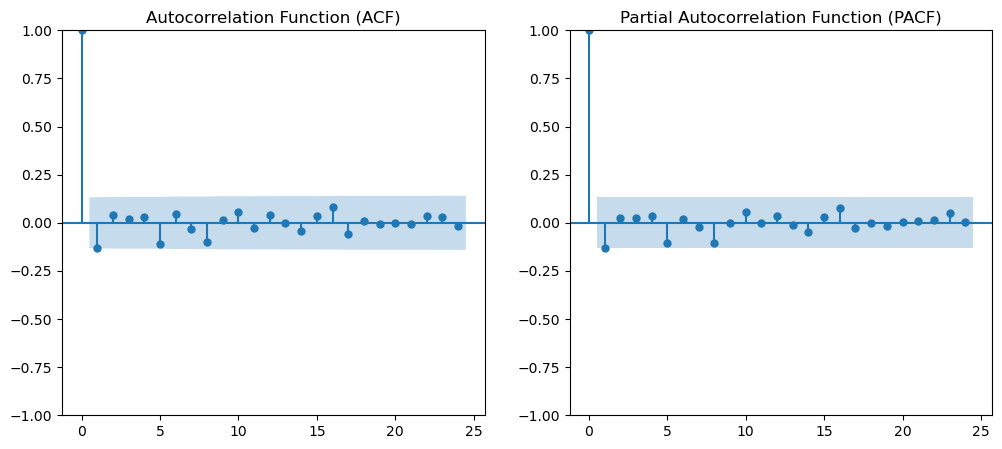

In [88]:
#  I will now plot ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to determine p and q.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (Identifies q value)
plot_acf(df['Close_Diff'], ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF Plot (Identifies p value)
plot_pacf(df['Close_Diff'], ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [66]:
#Now, I’ll fit the ARIMA(1,1,1) model and make future stock price predictions! 
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model with chosen parameters (p=1, d=1, q=1)
#I used Close_Diff instead of Close as ARIMA model needs stationary data
model = ARIMA(df['Close_Diff'], order=(1, 1, 1))

# Fit the ARIMA model
arima_result = model.fit()

# Display model summary
arima_result.summary()

C:\Users\Keert\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Keert\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Keert\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_Diff   No. Observations:                  220
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1487.463
Date:                Wed, 26 Mar 2025   AIC                           2980.927
Time:                        15:57:26   BIC                           2991.094
Sample:                             0   HQIC                          2985.033
                                - 220                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1337      0.041     -3.249      0.001      -0.214      -0.053
ma.L1         -0.9852      0.019    -52.853      0.000      -1.022      -0.949
sigma2      4.568e+04   2658.534     17.184      0.000    4.05e+04    5.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               392.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.84
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Keert\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Keert\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



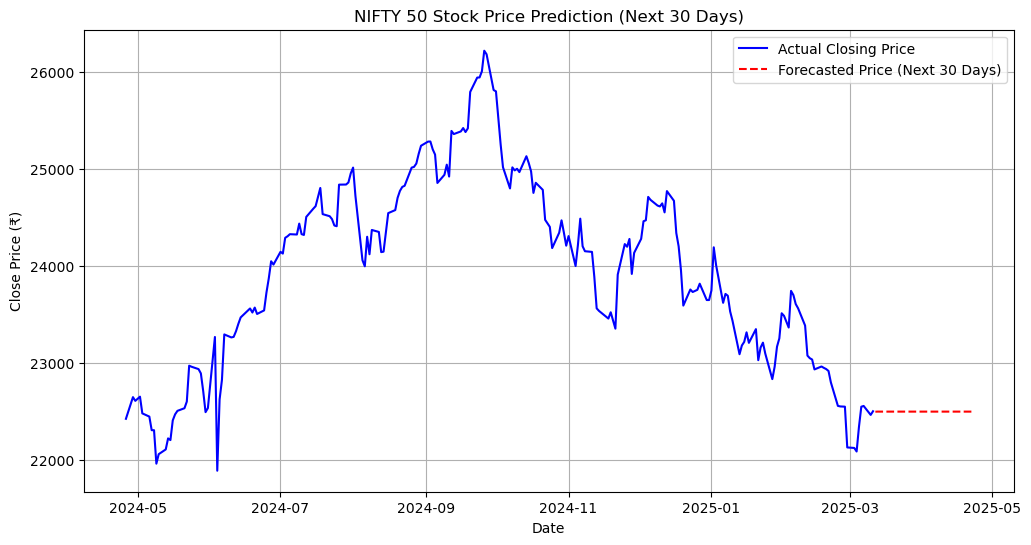

In [91]:
#Now, I will forecast the next 30 days and plot the predicted values.
# Forecast the next 30 days
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Generate future dates for plotting
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='B')[1:]

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Closing Price', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Price (Next 30 Days)', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price (₹)')
plt.title('NIFTY 50 Stock Price Prediction (Next 30 Days)')
plt.legend()
plt.grid()
plt.show()


### NOTE: ARIMA model is good for stationary time series data. In Stock Market as the data is not stationary the data is higly volatile and non-linear

When to Use What?

✅ Use LSTM if:
- You need to predict future stock prices or trends.
- Your data has long-term dependencies and non-linear relationships.
- You have a large dataset for training.

✅ Use GARCH if:
- You need to forecast volatility (not price).
- Your time series exhibits heteroskedasticity (changing variance over time).
- You are dealing with financial risk management.


#### 9. Let's use LSTM model
LSTM, short for Long Short-term Memory, is an extremely powerful algorithm for time series. It can capture historical trend patterns, and predict future values with high accuracy.

Long Short-Term Memory (LSTM) is a type of neural network that can learn and retain information over time. It's used to process and classify sequential data. 

RNN, short for Recurrent Neural Network, is a type of neural network architecture designed to process sequential data, such as text or time series, by maintaining an internal state that remembers past inputs, allowing it to learn patterns and dependencies within sequences. 

LSTM is a type of RNN with higher memory power to remember the outputs of each node for a more extended period to produce the outcome for the next node efficiently. LSTM networks combat the RNN's vanishing gradients or long-term dependence issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("NIFTY 50-12-03-2024-to-12-03-2025.csv")
indices = np.arange(len(df))
indices_train, indices_test = train_test_split(indices, test_size = 0.3)
df_train = df.iloc[indices_train]
df_test = df.iloc[indices_test]
df_train.to_csv("NIFTY_train.csv")
df_test.to_csv("NIFTY_test.csv")

In [3]:
NIFTY50=pd.read_csv("NIFTY_train.csv",parse_dates=True)
NIFTY50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       174 non-null    int64  
 1   Date             174 non-null    object 
 2   Open             174 non-null    float64
 3   High             174 non-null    float64
 4   Low              174 non-null    float64
 5   Close            174 non-null    float64
 6   Shares Traded    173 non-null    float64
 7   Turnover (₹ Cr)  173 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.0+ KB


In [4]:
NIFTY50.columns=NIFTY50.columns.str.strip()
NIFTY50.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [5]:
NIFTY50.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [6]:
NIFTY50['Close']=pd.to_numeric(NIFTY50['Close'],errors='coerce')
NIFTY50=NIFTY50.dropna()
trainData=NIFTY50.iloc[:,4:5].values
trainData

array([[24410.9 ],
       [22314.7 ],
       [24874.7 ],
       [24079.7 ],
       [22185.2 ],
       [24204.05],
       [24896.8 ],
       [23484.15],
       [24073.9 ],
       [23318.3 ],
       [21931.7 ],
       [25285.55],
       [23976.  ],
       [21964.6 ],
       [23050.  ],
       [22384.  ],
       [25008.15],
       [22503.75],
       [23670.45],
       [23100.35],
       [24979.4 ],
       [22858.5 ],
       [23556.25],
       [24172.6 ],
       [25739.2 ],
       [23316.3 ],
       [23062.3 ],
       [24753.15],
       [24307.25],
       [24587.65],
       [23842.75],
       [25199.4 ],
       [23170.65],
       [25871.35],
       [24774.6 ],
       [24366.3 ],
       [24184.9 ],
       [22976.85],
       [22986.65],
       [23350.4 ],
       [24145.65],
       [24066.65],
       [24522.95],
       [25352.25],
       [24510.65],
       [23927.15],
       [24679.6 ],
       [21916.55],
       [22004.7 ],
       [22303.8 ],
       [24311.2 ],
       [21793.1 ],
       [2496

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
trainData=sc.fit_transform(trainData)
trainData.shape

(173, 1)

__When constructing X_train, you typically append past timestep values for each training instance. This means each sample in X_train contains timestep historical values of the stock price to predict the next price (y_train).__

In [9]:
#X_train and y_train represent the inputs and outputs of the training data subset
X_train=[]
y_train=[]

#In time series forecasting with LSTM, the timestep represents how many past observations you use to predict the next value.
for i in range(60,173):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

#### 1. Why is reshaping needed?
- LSTM networks in Keras/TensorFlow expect input in the shape:
   (samples, timesteps, features)
    where,
      samples = total training sequences (number of rows in X_train)
      timesteps = number of past days used (e.g., 60)
      features = number of features per timestep (e.g., closing price → 1 feature)


In [10]:
#X_train.shape[0] → Number of training samples (total sequences)
#X_train.shape[1] → Number of timesteps (e.g., past 60 days)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding batch_size axis,
X_train.shape

(113, 60, 1)

In [11]:
model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\Keert\anaconda3\envs\JupyterNotebook-IntWebAppEnv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1))

**units=100** → The LSTM layer has 100 memory units (neurons).

**return_sequences=True** → Ensures that the output is a sequence, allowing the next LSTM layer to process it.

**input_shape=(X_train.shape[1],1)** → Defines the input shape:

**X_train.shape[1]** → Number of timesteps (e.g., 60 past days).

**1** → Number of features per timestep (closing price).

**Dropout(0.2)** -> Helps prevent overfitting by randomly setting 20% of neurons to zero during training.


#### Output Layer

Dense Layer (Fully Connected Layer)

**units=1** → The output is one value (the predicted stock price).



In [12]:
hist=model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
4/4 - 6s - 2s/step - loss: 0.1627
Epoch 2/20
4/4 - 0s - 107ms/step - loss: 0.1002
Epoch 3/20
4/4 - 0s - 92ms/step - loss: 0.0907
Epoch 4/20
4/4 - 0s - 99ms/step - loss: 0.0848
Epoch 5/20
4/4 - 0s - 96ms/step - loss: 0.0776
Epoch 6/20
4/4 - 0s - 95ms/step - loss: 0.0799
Epoch 7/20
4/4 - 0s - 94ms/step - loss: 0.0765
Epoch 8/20
4/4 - 0s - 93ms/step - loss: 0.0744
Epoch 9/20
4/4 - 0s - 94ms/step - loss: 0.0731
Epoch 10/20
4/4 - 0s - 97ms/step - loss: 0.0731
Epoch 11/20
4/4 - 0s - 94ms/step - loss: 0.0721
Epoch 12/20
4/4 - 0s - 92ms/step - loss: 0.0714
Epoch 13/20
4/4 - 0s - 105ms/step - loss: 0.0720
Epoch 14/20
4/4 - 0s - 93ms/step - loss: 0.0710
Epoch 15/20
4/4 - 0s - 93ms/step - loss: 0.0711
Epoch 16/20
4/4 - 0s - 104ms/step - loss: 0.0706
Epoch 17/20
4/4 - 0s - 96ms/step - loss: 0.0705
Epoch 18/20
4/4 - 0s - 107ms/step - loss: 0.0693
Epoch 19/20
4/4 - 0s - 97ms/step - loss: 0.0702
Epoch 20/20
4/4 - 0s - 101ms/step - loss: 0.0693


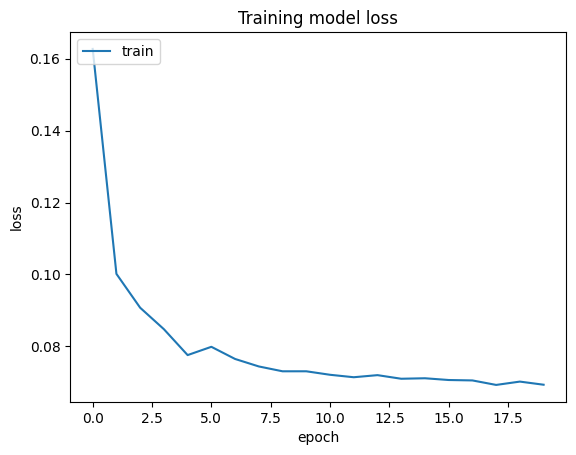

In [14]:
plt.plot(hist.history['loss'])
plt.title("Training model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [34]:
#read the test csv file 
testData=pd.read_csv('NIFTY_test.csv')

#strip the column names as they have spaces
testData.columns=testData.columns.str.strip()

#Convert the Close Column to numeric
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')

#drop the null values
testData=testData.dropna()

#this will consider the Close Column
testData=testData.iloc[:,4:5]

y_test=testData.iloc[60:,0:].values

#input array for the model
inputClosing=testData.iloc[:,0:].values

inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape

X_test=[]
length=len(testData)
timestep=60

for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(15, 60, 1)

In [41]:
y_test.shape

(15, 1)

In [36]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Low     75 non-null     float64
dtypes: float64(1)
memory usage: 732.0 bytes


In [37]:
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[[0.11011592],
        [0.18341252],
        [0.2464639 ],
        [0.29924506],
        [0.34124917],
        [0.37215596],
        [0.39373317],
        [0.4085295 ],
        [0.4174897 ],
        [0.4219038 ],
        [0.42251024],
        [0.42055535],
        [0.41783267],
        [0.4152259 ],
        [0.41377944],
        [0.412892  ],
        [0.4124605 ],
        [0.41207737],
        [0.41183212],
        [0.41284853],
        [0.41545463],
        [0.41986996],
        [0.4243817 ],
        [0.42699185],
        [0.42747235],
        [0.42568535],
        [0.421746  ],
        [0.41658717],
        [0.4106824 ],
        [0.40454894],
        [0.39851442],
        [0.39299613],
        [0.38877866],
        [0.38629347],
        [0.38513136],
        [0.38545623],
        [0.3882695 ],
        [0.3933013 ],
        [0.39873797],
        [0.4028672 ],
        [0.40499768],
        [0.40502572],
        [0.40395808],
        [0.4033999 ],
        [0.4041057 ],
        [0

##### 1️⃣ Why is inverse_transform Needed?
When training an LSTM model for stock price prediction, we normalize the stock prices to scale them between 0 and 1.
This is done because LSTMs perform better when input values are small and normalized.

However, after making predictions, we need to convert the scaled values back to their original stock price range

In [40]:
predicted_price = sc.inverse_transform(y_pred.reshape(-1, 1))  # Shape: (40, 1)
predicted_price.shape

(900, 1)

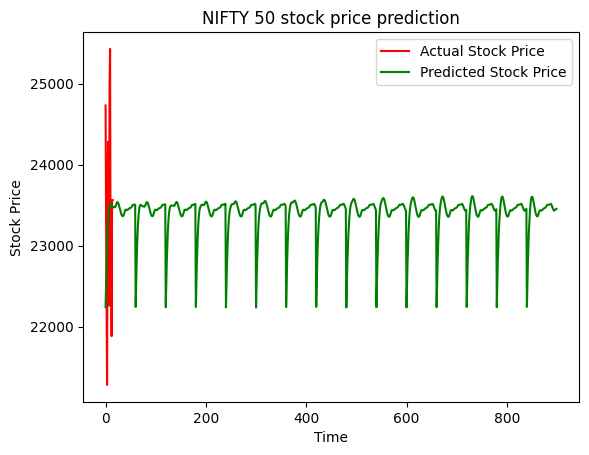

In [39]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('NIFTY 50 stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()